**Feature Extraction :**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

%matplotlib inline

In [43]:
#Load the wine datasets
wine = load_wine()
X, y = wine.data, wine.target

In [44]:
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [45]:
df = pd.concat(
    [pd.DataFrame(X, columns=wine.feature_names), pd.Series(y, name='target')],axis=1
)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [46]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
#Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca.shape


(178, 13)

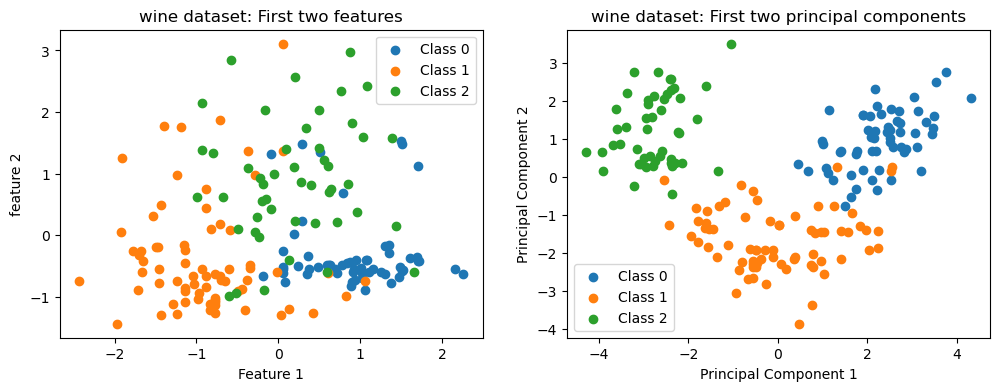

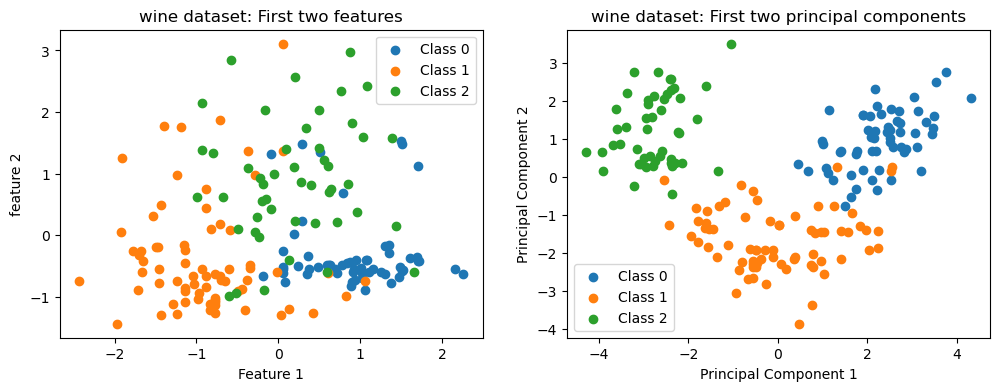

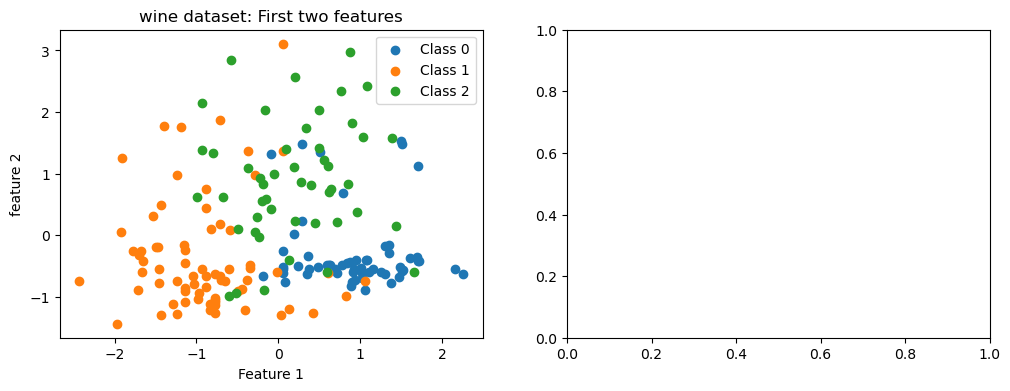

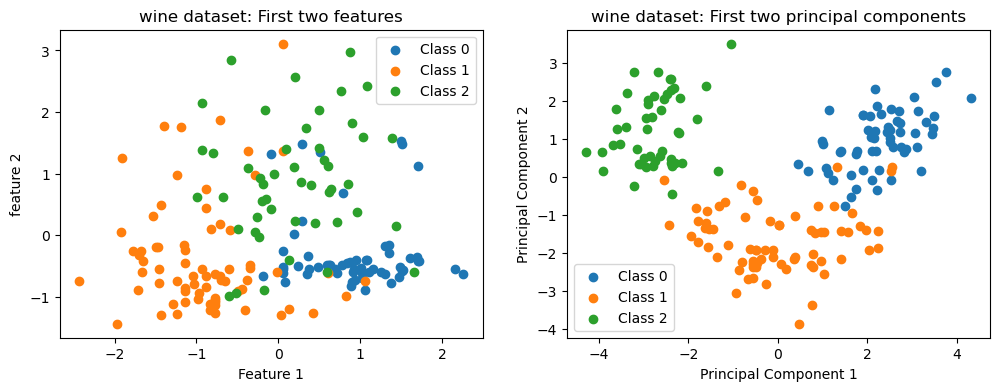

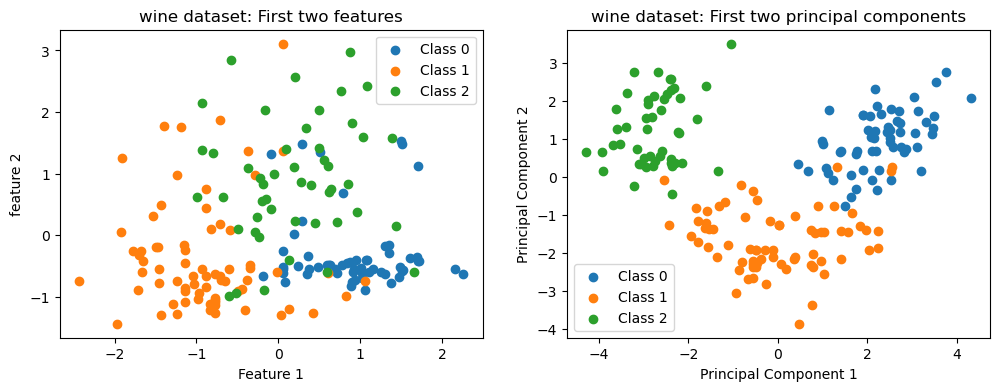

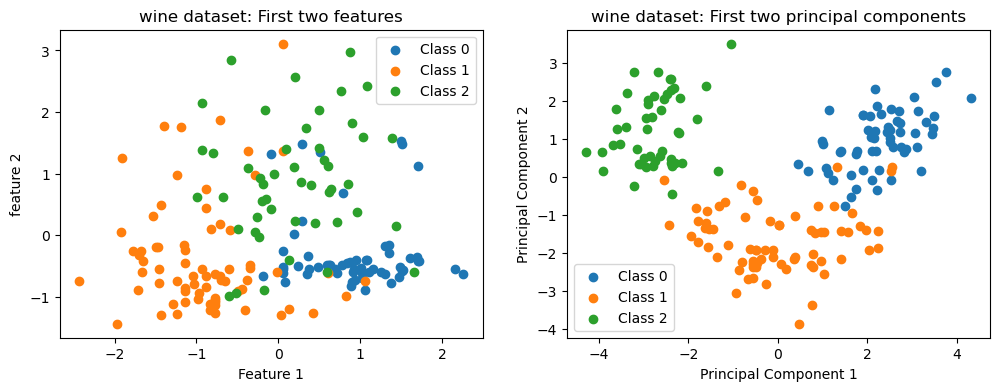

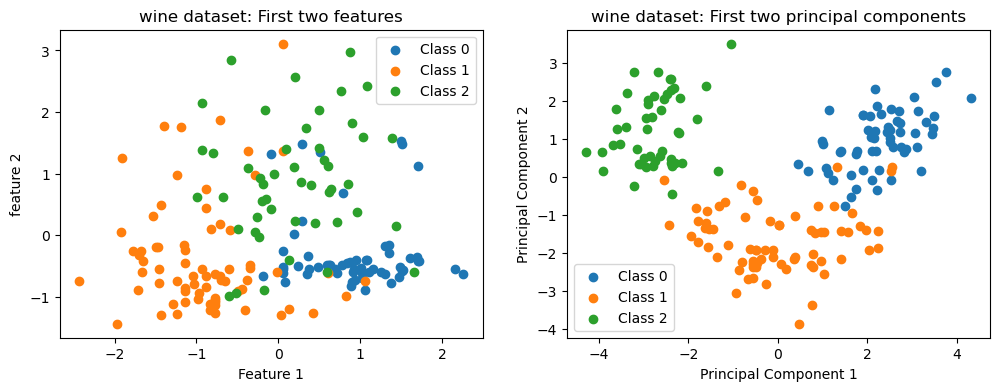

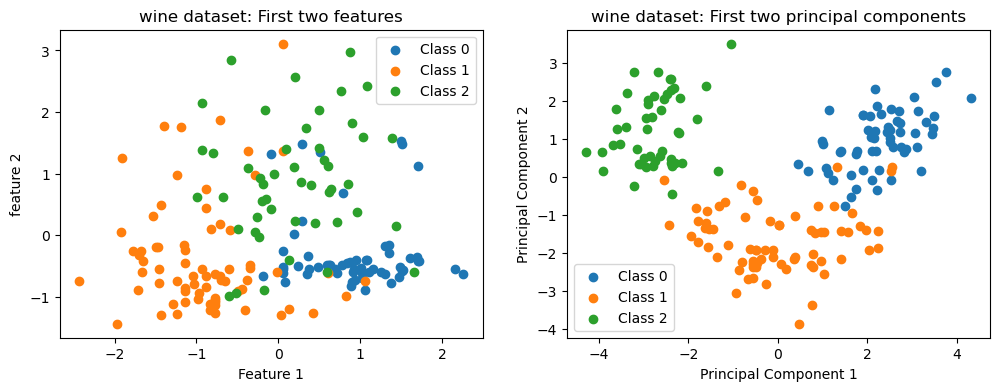

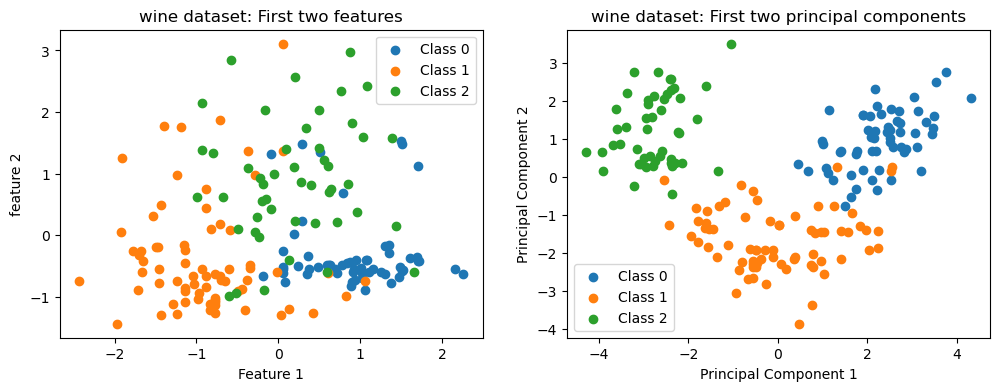

In [49]:
#Plot the first two principal components of the data
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
for i in range(3):
    axs[0].scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], label=f'Class {i}')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('feature 2')
axs[0].legend()
axs[0].set_title('wine dataset: First two features')

plt.subplot(1, 2, 2)
for i in range(3):
    axs[1].scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].legend()
axs[1].set_title('wine dataset: First two principal components')
plt.show()

In [50]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])